In [1]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# REPORT 2
## Complete Cooling System Analysis

In [3]:
test_data_file_path = 'Test values.xlsx'
test_data = pd.ExcelFile(test_data_file_path)

sheet_names = test_data.sheet_names
print(*sheet_names, sep='\n')

sheet_names[8]

PumpV with Flow rate
Rubber tube flow testing
12V pump-3 fan - temp testing
7V pump-3 fan- temp testing
3.5V pump-3 fan- temp testing
3.5V pump-no fan-temp testing
12V pump-no fan-temp testing
7.5V pump-no fan- temp testing
12V pump - 1 fan - temp testin 
7V pump-1 fan-tem testing
3.5V-1 fan-temp testing
12V pump-2 fan-temp testing
7V pump-2 fan-temp testing
3.5V pump-2 fan-temp testing
12V pump-chiller-temp testing
7V pump-chiller-temp testing
3.5V pump-chiller-temp testing


'12V pump - 1 fan - temp testin '

## Newton's Cooling Law

### Plot Relation ships between time and temperature for 3.5V, 7V, 12V when all 3 fans are working 

In [6]:
### Create a dictionary where each key will be a different dataframe for each voltage when all fans are working

fan_3_name_list = ['3.5V pump-3 fan- temp testing','7V pump-3 fan- temp testing','12V pump-3 fan - temp testing']

fan_3_dict = {key: pd.read_excel(test_data_file_path, key, header=0, usecols=range(3)).ffill() for key in fan_3_name_list}

## fan_3_dict['3.5V pump-3 fan- temp testing'].iloc[1:3]

### Create the other dictionaries for 1 and 2 fans
## 2FAN
fan_2_name_list = ['3.5V pump-2 fan-temp testing','7V pump-2 fan-temp testing','12V pump-2 fan-temp testing']

fan_2_dict = {key: pd.read_excel(test_data_file_path, key, header=0, usecols=range(3)).ffill() for key in fan_2_name_list}

## 1FAN
fan_1_name_list = ['3.5V-1 fan-temp testing','7V pump-1 fan-tem testing','12V pump - 1 fan - temp testin ']

fan_1_dict = {key: pd.read_excel(test_data_file_path, key, header=0, usecols=range(3)).ffill() for key in fan_1_name_list}


## 0 FAN
fan_0_name_list = ['3.5V pump-no fan-temp testing','7.5V pump-no fan- temp testing','12V pump-no fan-temp testing']

fan_0_dict = {key: pd.read_excel(test_data_file_path, key, header=0, usecols=range(3)).ffill() for key in fan_0_name_list}


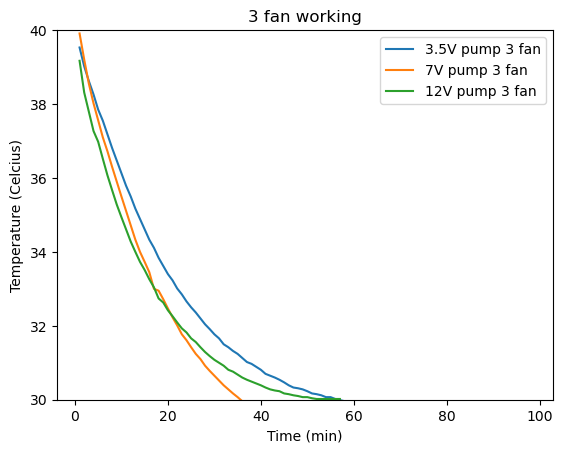

In [7]:
x_col = 'Time (min)'
y_col = 'Temperature (Celcius)'

for key in fan_3_name_list:
    plt.plot(fan_3_dict[key][x_col], fan_3_dict[key][y_col], label=f'{key[:15].replace("-", " ").rstrip()}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{key[9:15].replace("-", " ").rstrip()} working')
plt.ylim(30,40)
plt.legend()
plt.show()

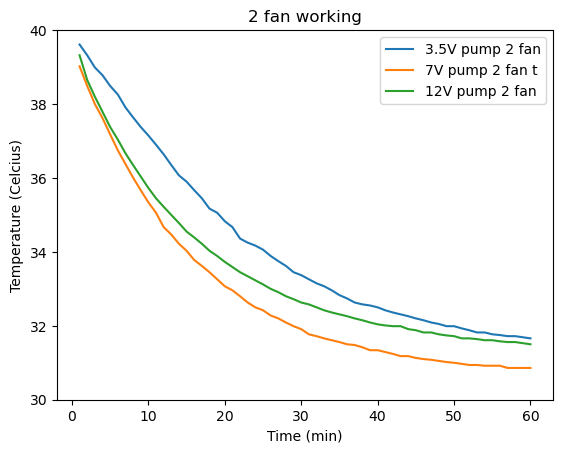

In [8]:
for key in fan_2_name_list:
    plt.plot(fan_2_dict[key][x_col], fan_2_dict[key][y_col], label=f'{key[:15].replace("-", " ").rstrip()}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{key[9:15].replace("-", " ").rstrip()} working')
plt.ylim(30,40)
plt.legend()
plt.show()

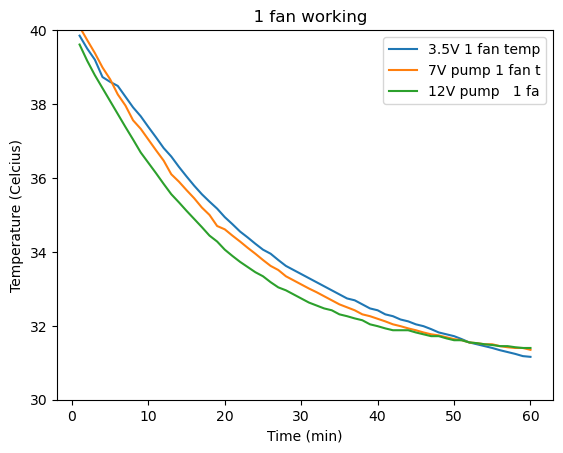

In [9]:
for key in fan_1_name_list:
    plt.plot(fan_1_dict[key][x_col], fan_1_dict[key][y_col], label=f'{key[:15].replace("-", " ").rstrip()}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{key[9:16].replace("-", " ").rstrip()} working')
plt.ylim(30,40)
plt.legend()
plt.show()

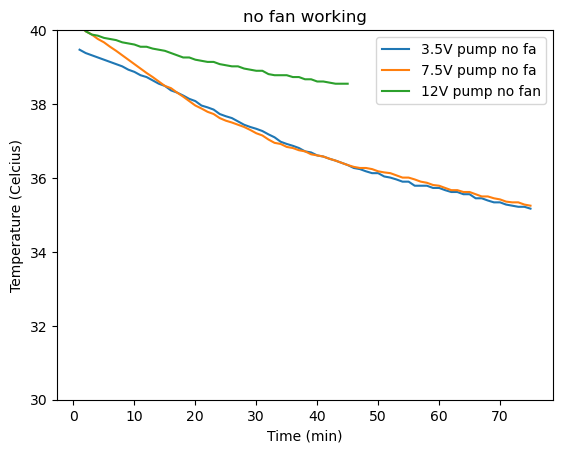

In [10]:
for key in fan_0_name_list:
    plt.plot(fan_0_dict[key][x_col], fan_0_dict[key][y_col], label=f'{key[:15].replace("-", " ").rstrip()}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{key[9:15].replace("-", " ").rstrip()} working')
plt.ylim(30,40)
plt.legend()
plt.show()

In [11]:
# List all initial temperatures and ambient temperatures 

volts = [3.5, 7, 12]

# 3 FAN
tamb_3_fan = [28, 26.1, 27]
t0_3_fan = [40.15, 40.34, 40.34]

# 2 FAN
tamb_2_fan = [29.5, 29, 28]
t0_2_fan = [40.06, 40, 40.09]


# 1 FAN
tamb_1_fan = [28, 28, 27]
t0_1_fan = [40.15, 40.46, 40.27]


# 0 FAN
tamb_0_fan = [29, 30, 29]
t0_0_fan = [40, 40.34, 40.58]


In [12]:
# Create the difference column, this will represent the cooling speed per minute (Celsius/min) and calculate kappa, fill rows with zero value
# add a column to relate kappa and voltage, this will be used as an indicator of performance 

# 3 FAN
for key, volt,Ta,T0 in zip(fan_3_name_list, volts, tamb_3_fan, t0_3_fan):
    if fan_3_dict[key]['Time (min)'].iloc[0] == 1:
        fan_3_dict[key]['Cooling Speed (Celsius/min)'] = abs(fan_3_dict[key]['Temperature (Celcius)'].diff())
    fan_3_dict[key]['Voltage'] = volt
    fan_3_dict[key]['kappa'] = fan_3_dict[key]['Cooling Speed (Celsius/min)']/(fan_3_dict[key]['Temperature (Celcius)']-Ta)
    if fan_3_dict[key]['Time (min)'].iloc[0] == 1:
        fan_3_dict[key] = fan_3_dict[key].iloc[1:]
    fan_3_dict[key] = fan_3_dict[key].replace(0, method='ffill')
    fan_3_dict[key]['kappa/volts'] = fan_3_dict[key]['kappa'] / fan_3_dict[key]['Voltage']
    fan_3_dict[key]['Ambient Temperature'] = Ta
    fan_3_dict[key]['Initial Temperature'] = T0


# 2 FAN
for key, volt,Ta,T0 in zip(fan_2_name_list, volts, tamb_2_fan, t0_2_fan):
    if fan_2_dict[key]['Time (min)'].iloc[0] == 1:
        fan_2_dict[key]['Cooling Speed (Celsius/min)'] = abs(fan_2_dict[key]['Temperature (Celcius)'].diff())
    fan_2_dict[key]['Voltage'] = volt
    fan_2_dict[key]['kappa'] = fan_2_dict[key]['Cooling Speed (Celsius/min)']/(fan_2_dict[key]['Temperature (Celcius)']-Ta)
    if fan_2_dict[key]['Time (min)'].iloc[0] == 1:
        fan_2_dict[key] = fan_2_dict[key].iloc[1:]
    fan_2_dict[key] = fan_2_dict[key].replace(0, method='ffill')
    fan_2_dict[key]['kappa/volts'] = fan_2_dict[key]['kappa'] / fan_2_dict[key]['Voltage']
    fan_2_dict[key]['Ambient Temperature'] = Ta
    fan_2_dict[key]['Initial Temperature'] = T0


# 1 FAN
for key, volt,Ta,T0 in zip(fan_1_name_list, volts, tamb_1_fan, t0_1_fan):
    if fan_1_dict[key]['Time (min)'].iloc[0] == 1:
        fan_1_dict[key]['Cooling Speed (Celsius/min)'] = abs(fan_1_dict[key]['Temperature (Celcius)'].diff())
    fan_1_dict[key]['Voltage'] = volt
    fan_1_dict[key]['kappa'] = fan_1_dict[key]['Cooling Speed (Celsius/min)']/(fan_1_dict[key]['Temperature (Celcius)']-Ta)
    if fan_1_dict[key]['Time (min)'].iloc[0] == 1:
        fan_1_dict[key] = fan_1_dict[key].iloc[1:]
    fan_1_dict[key] = fan_1_dict[key].replace(0, method='ffill')
    fan_1_dict[key]['kappa/volts'] = fan_1_dict[key]['kappa'] / fan_1_dict[key]['Voltage']
    fan_1_dict[key]['Initial Temperature'] = T0
    fan_1_dict[key]['Ambient Temperature'] = Ta
    

# 0 FAN
for key, volt,Ta,T0 in zip(fan_0_name_list, volts, tamb_0_fan, t0_0_fan):
    if fan_0_dict[key]['Time (min)'].iloc[0] == 1:
        fan_0_dict[key]['Cooling Speed (Celsius/min)'] = abs(fan_0_dict[key]['Temperature (Celcius)'].diff())
    fan_0_dict[key]['Voltage'] = volt
    fan_0_dict[key]['kappa'] = fan_0_dict[key]['Cooling Speed (Celsius/min)']/(fan_0_dict[key]['Temperature (Celcius)']-Ta)
    if fan_0_dict[key]['Time (min)'].iloc[0] == 1:
        fan_0_dict[key] = fan_0_dict[key].iloc[1:]
    fan_0_dict[key] = fan_0_dict[key].replace(0, method='ffill')
    fan_0_dict[key]['kappa/volts'] = fan_0_dict[key]['kappa'] / fan_0_dict[key]['Voltage']
    fan_0_dict[key]['Initial Temperature'] = T0
    fan_0_dict[key]['Ambient Temperature'] = Ta

C:\Users\super\AppData\Local\Temp\ipykernel_30596\1055688754.py:12: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  fan_3_dict[key] = fan_3_dict[key].replace(0, method='ffill')
C:\Users\super\AppData\Local\Temp\ipykernel_30596\1055688754.py:12: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  fan_3_dict[key] = fan_3_dict[key].replace(0, method='ffill')
C:\Users\super\AppData\Local\Temp\ipykernel_30596\1055688754.py:12: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  fan_3_dict[key] = fan_3_dict[key].replace(0, method='ffill')
C:\Users\super\AppData\Local\Temp\ipykernel_30596\1055688754.py:26: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  fan_2_dict[key] = fan_2_dict[key].replace(0, method='ffill')
C:\Users\super\AppData\Local

## Join the dataframes into one per number of fans


In [14]:
data_3_fan = pd.concat(fan_3_dict.values(), ignore_index=True)
data_2_fan = pd.concat(fan_2_dict.values(), ignore_index=True)
data_1_fan = pd.concat(fan_1_dict.values(), ignore_index=True)
data_0_fan = pd.concat(fan_0_dict.values(), ignore_index=True)

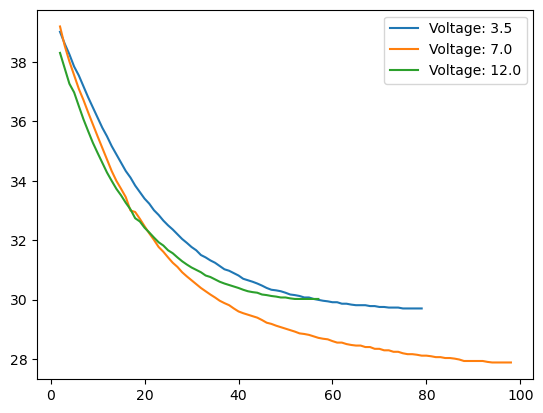

In [15]:
grouped = data_3_fan.groupby('Voltage')

for key, group in grouped:
    plt.plot(group[x_col], group[y_col], label=f'Voltage: {key}')

plt.legend()
plt.show()

In [16]:
from scipy.optimize import curve_fit

def neg_exp(variables, k):
    #time, T0, Ta = variables
    return (T0 - Ta) * np.exp(-k * time) + Ta



y = data_3_fan[data_3_fan['Voltage']==3.5]['Temperature (Celcius)']
ta = data_3_fan[data_3_fan['Voltage']==3.5]['Ambient Temperature']
t0 = data_3_fan[data_3_fan['Voltage']==3.5]['Initial Temperature']
time = data_3_fan[data_3_fan['Voltage']==3.5]['Time (min)']

variables = [time, t0, ta]

param, covariance = curve_fit(neg_exp, variables, y)
print(f'kappa: {param[0]:.4f}')

kappa: 0.0468


In [17]:
import numpy as np

def p_variance(data):
    var = np.var(data)
    mean = np.mean(data)
    p_var = var/mean
    print()
    print(f'Variance: {var:.8f}')
    print(f'Mean: {mean:.8f}')
    print(f'Percentage Variance: {p_var:.6%}')
    return p_var

3.5 voltage data. R² score: 96.42%
7 voltage data. R² score: 92.17%
12 voltage data. R² score: 85.54%

3.5 volts
k: 0.0360

7 volts
k: 0.0335

12 volts
k: 0.0388
[0.036, 0.0335, 0.0388]

Variance: 0.00000469
Mean: 0.03610000
Percentage Variance: 0.012982%
Statistically insignificant difference between the values


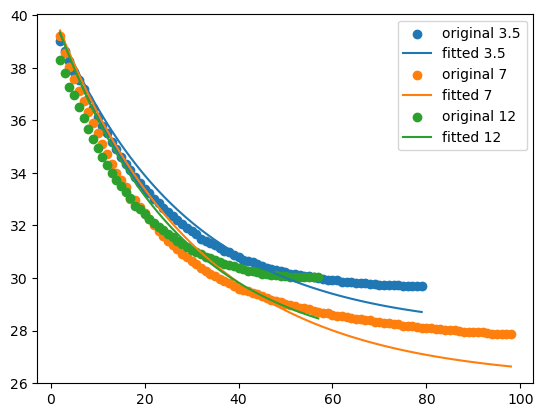

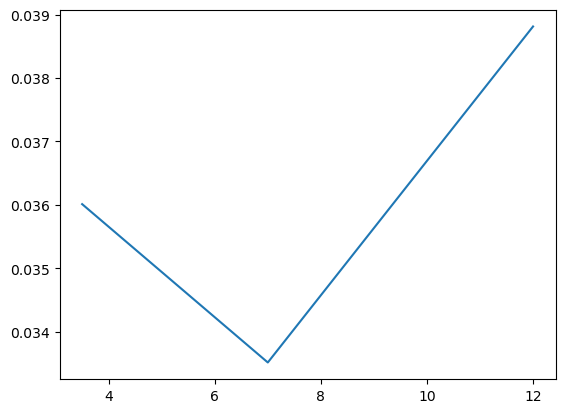

In [18]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def inverse_exp(variables, k):
    time, T0, Ta = variables
    return (T0 - Ta) * np.exp(-k * time) + Ta

kappas = []
params_dict = {}

for volt in volts:
    time = data_3_fan[data_3_fan['Voltage']==volt][x_col]
    temp = data_3_fan[data_3_fan['Voltage']==volt][y_col]
    t0 = data_3_fan[data_3_fan['Voltage']==volt]['Initial Temperature']
    ta = data_3_fan[data_3_fan['Voltage']==volt]['Ambient Temperature']

    variables = [time, t0, ta]
    
    params, covariance = curve_fit(inverse_exp, variables , temp)
    kappas.append(params[0])

    plt.scatter(time,temp, label = f'original {volt}')
    plt.plot(time, inverse_exp(variables, *params),label = f'fitted {volt}')
    params_dict[volt] = params

    r2 = r2_score(temp, inverse_exp(variables, *params))
    
    print(f'{volt} voltage data. R\u00b2 score: {r2:.2%}')

ks_3 = []

for key, value in params_dict.items():
    print()
    print(key, 'volts')
    print(f'k: {value[0]:.4f}')
    ks_3.append(np.round(value[0],4))

print(ks_3)
p_var = p_variance(ks_3)

threshold = 0.05

if p_var < threshold:
    print('Statistically insignificant difference between the values')
else:
    print('Statistically significant difference between the values')
    
plt.legend()
plt.show()


plt.plot(volts, kappas, label = 'kappas')
plt.show()

3.5 voltage data. R² score: 98.77%
7 voltage data. R² score: 96.01%
12 voltage data. R² score: 86.65%

3.5 volts
k: 0.0255

7 volts
k: 0.0277

12 volts
k: 0.0253
[0.0255, 0.0277, 0.0253]

Variance: 0.00000118
Mean: 0.02616667
Percentage Variance: 0.004518%
Statistically insignificant difference between the values


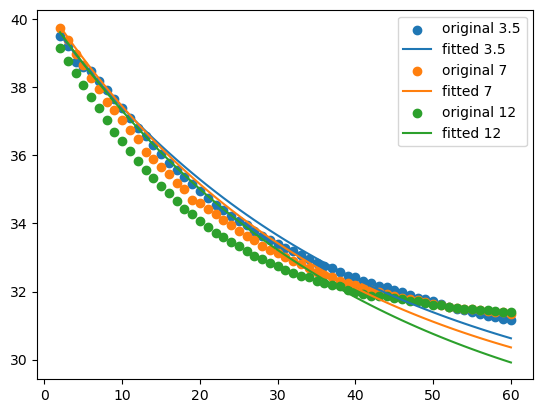

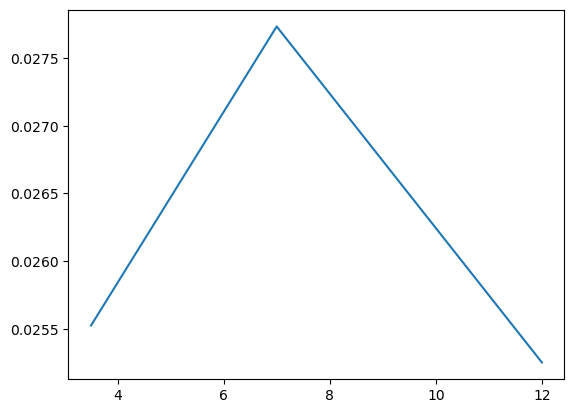

In [19]:
kappas = []
params_dict = {}

for volt in volts:
    time = data_1_fan[data_1_fan['Voltage']==volt][x_col]
    temp = data_1_fan[data_1_fan['Voltage']==volt][y_col]
    t0 = data_1_fan[data_1_fan['Voltage']==volt]['Initial Temperature']
    ta = data_1_fan[data_1_fan['Voltage']==volt]['Ambient Temperature']

    variables = [time, t0, ta]
    
    params, covariance = curve_fit(inverse_exp, variables , temp)
    kappas.append(params[0])

    plt.scatter(time,temp, label = f'original {volt}')
    plt.plot(time, inverse_exp(variables, *params),label = f'fitted {volt}')
    params_dict[volt] = params

    r2 = r2_score(temp, inverse_exp(variables, *params))
    
    print(f'{volt} voltage data. R\u00b2 score: {r2:.2%}')
    

ks_1 = []

for key, value in params_dict.items():
    print()
    print(key, 'volts')
    print(f'k: {value[0]:.4f}')
    ks_1.append(np.round(value[0],4))


print(ks_1)
p_var = p_variance(ks_1)

threshold = 0.05

if p_var < threshold:
    print('Statistically insignificant difference between the values')
else:
    print('Statistically significant difference between the values')
    
plt.legend()
plt.show()

plt.plot(volts, kappas, label = 'kappas')
plt.show()

3.5 voltage data. R² score: 97.15%
7 voltage data. R² score: 94.96%
12 voltage data. R² score: 54.22%

3.5 volts
k: 0.0086

7 volts
k: 0.0104

12 volts
k: 0.0052
[0.0086, 0.0104, 0.0052]

Variance: 0.00000465
Mean: 0.00806667
Percentage Variance: 0.057631%
Statistically insignificant difference between the values


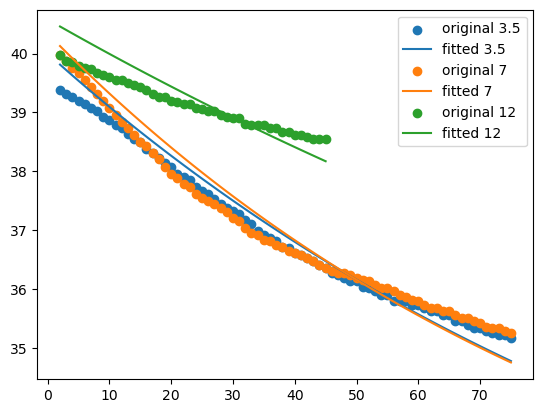

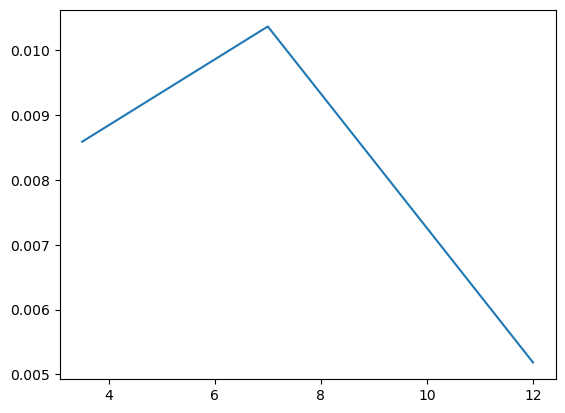

In [20]:
kappas = []
params_dict = {}

for volt in volts:
    time = data_0_fan[data_0_fan['Voltage']==volt][x_col]
    temp = data_0_fan[data_0_fan['Voltage']==volt][y_col]
    t0 = data_0_fan[data_0_fan['Voltage']==volt]['Initial Temperature']
    ta = data_0_fan[data_0_fan['Voltage']==volt]['Ambient Temperature']

    variables = [time, t0, ta]
    
    params, covariance = curve_fit(inverse_exp, variables , temp)
    kappas.append(params[0])

    plt.scatter(time,temp, label = f'original {volt}')
    plt.plot(time, inverse_exp(variables, *params),label = f'fitted {volt}')
    params_dict[volt] = params

    r2 = r2_score(temp, inverse_exp(variables, *params))
    
    print(f'{volt} voltage data. R\u00b2 score: {r2:.2%}')
    



ks_0 = []

for key, value in params_dict.items():
    print()
    print(key, 'volts')
    print(f'k: {value[0]:.4f}')
    ks_0.append(np.round(value[0],4))

print(ks_0)
p_var = p_variance(ks_0)

threshold = 0.05

if p_var < threshold:
    print('Statistically insignificant difference between the values')
else:
    print('Statistically significant difference between the values')

plt.legend()
plt.show()

plt.plot(volts, kappas, label = 'kappas')
plt.show()

3.5 voltage data. R² score: 98.73%
7 voltage data. R² score: 91.08%
12 voltage data. R² score: 77.40%

3.5 volts
k: 0.0317

7 volts
k: 0.0439

12 volts
k: 0.0297
[0.0317, 0.0439, 0.0297]

Variance: 0.00003939
Mean: 0.03510000
Percentage Variance: 0.112213%
Statistically insignificant difference between the values


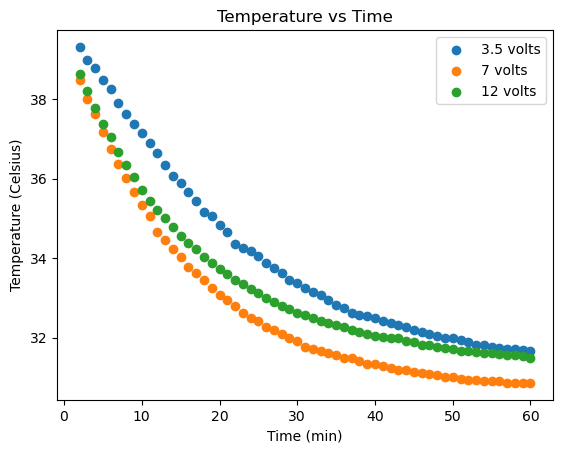

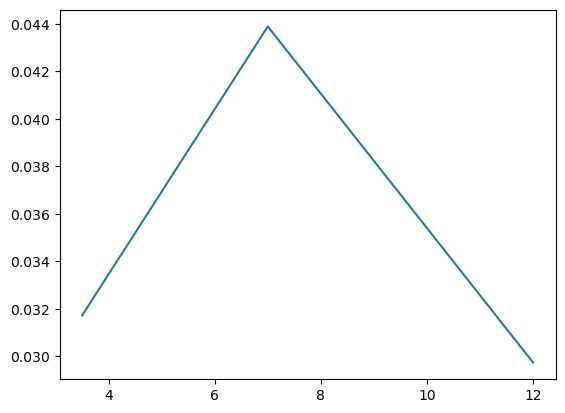

In [21]:
kappas = []
params_dict = {}

for volt, tamb in zip(volts, t0_2_fan):
    time = data_2_fan[data_2_fan['Voltage']==volt][x_col]
    temp = data_2_fan[data_2_fan['Voltage']==volt][y_col]
    t0 = data_2_fan[data_2_fan['Voltage']==volt]['Initial Temperature']
    ta = data_2_fan[data_2_fan['Voltage']==volt]['Ambient Temperature']

    variables = [time, t0, ta]
    
    params, covariance = curve_fit(inverse_exp, variables , temp)
    kappas.append(params[0])

    plt.scatter(time,temp, label = f'{volt} volts')
    plt.title('Temperature vs Time')
    plt.xlabel(x_col)
    plt.ylabel('Temperature (Celsius)')
    #plt.plot(time, inverse_exp(variables, *params),label = f'fitted {volt}')
    params_dict[volt] = params

    r2 = r2_score(temp, inverse_exp(variables, *params))
    
    print(f'{volt} voltage data. R\u00b2 score: {r2:.2%}')

plt.legend()
plt.savefig('Rep 2/Temp_vs_Time.png')
ks_2 = []

for key, value in params_dict.items():
    print()
    print(key, 'volts')
    print(f'k: {value[0]:.4f}')
    ks_2.append(np.round(value[0],4))


print(ks_2)
p_var = p_variance(ks_2)

threshold = 0.05

if p_var < threshold:
    print('Statistically insignificant difference between the values')
else:
    print('Statistically significant difference between the values')
    

plt.legend()
plt.show()

plt.plot(volts, kappas, label = 'kappas')
plt.show()

[0.036, 0.0335, 0.0388, 0.0317, 0.0439, 0.0297, 0.0255, 0.0277, 0.0253, 0.0086, 0.0104, 0.0052]

Variance: 0.00013896
Mean: 0.02635833
Percentage Variance: 0.527199%
Statistically insignificant difference between the values


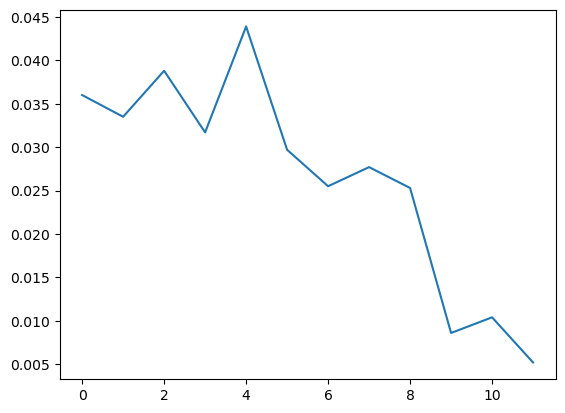

In [22]:
ks = ks_3 + ks_2 + ks_1 + ks_0

print(ks)
p_var = p_variance(ks)

threshold = 0.05

if p_var < threshold:
    print('Statistically insignificant difference between the values')
else:
    print('Statistically significant difference between the values')
    

plt.plot(range(len(ks)), ks)
plt.show()

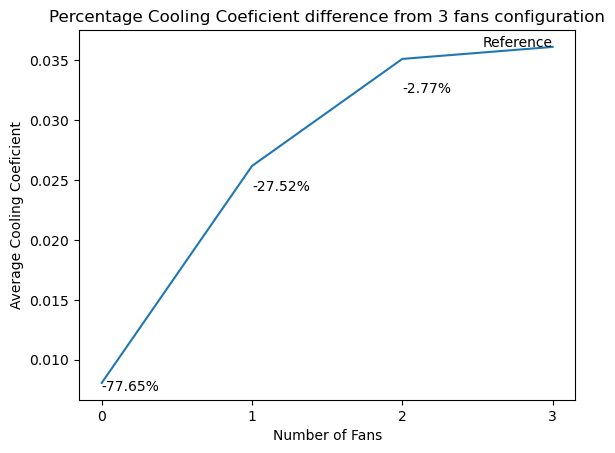

In [23]:
ks_mean = [np.mean(ks_0), np.mean(ks_1), np.mean(ks_2), np.mean(ks_3)]



# Calculte Percentage difference against 3 fan configuration

p_diff_to_3_fan = [(value)/ks_mean[-1]-1 for value in ks_mean[:-1]]

for i, j, k in zip(range(len(ks_mean)-1), ks_mean[:-1] ,p_diff_to_3_fan):
    plt.text(i,.92*j, f'{k:.2%}', ha='left')

plt.text(3,ks_mean[-1],f'Reference', ha='right')

plt.plot(range(len(ks_mean)), ks_mean)
plt.xticks(range(len(ks_mean)))
plt.title('Percentage Cooling Coeficient difference from 3 fans configuration')
plt.ylabel('Average Cooling Coeficient')
plt.xlabel('Number of Fans')
plt.savefig('Rep 2/p_cool_coef_diff.png')
plt.show()

# More fan increases the cooling speed but how much difference does it make to have 3 fans against 2,1 or non fans.
# By using a threshold of 5% to indicate if there is a significant statistical difference between the values
# if it is below 5% then the difference is not significant enough to go for a 3 fan configuration rather than a 2 fan configuration
# by assuming that each fan uses the same amount of energy a 2 fan configuration uses 33% less energy than a 3 fan configuration
# with a decrease of just 2.77% difference in performance based on the cooling coefficient.

# Contnue analysis for the 2 fans configuration

In [25]:
data = data_2_fan
t0 = t0_2_fan
ta = tamb_2_fan
t0, ta

([40.06, 40, 40.09], [29.5, 29, 28])

In [26]:
def data_sep_by_volt(data):
    dict = {}
    volts = [3.5, 7, 12]
    for volt in volts:
        dict[f'data_{volt}'] = data[data['Voltage'] == volt].drop('Voltage', axis=1)
    return dict

In [27]:
dict = data_sep_by_volt(data)

In [28]:
# Create a function to fit the values and then compare the accuracy of each kappa

def exponential(time, t0, ta, k):
    return (t0 - ta) * np.exp(-k * time) + ta

In [29]:
time = 'Time (min)'
temp = 'Temperature (Celcius)'
    
def coefficient_calculation(dict):

    kappas = []
    
    for volt in volts:
        params, _ = curve_fit(exponential, dict[f'data_{volt}'][time], dict[f'data_{volt}'][temp])
        kappas.append(params)
    return kappas



In [30]:
# parameter order per list t0, ta, k in coefs
coefs = coefficient_calculation(dict)

# parameter order 3.5, 7, 12 in kappas
kappas = [coef[-1] for coef in coefs]

# create a list of array with just the temperature coefficients. t0, ta
temp_coefs = [coef[:-1] for coef in coefs]
temp_coefs

[array([40.36879278, 30.88726781]),
 array([39.66111647, 30.66327381]),
 array([39.57234371, 31.35074705])]

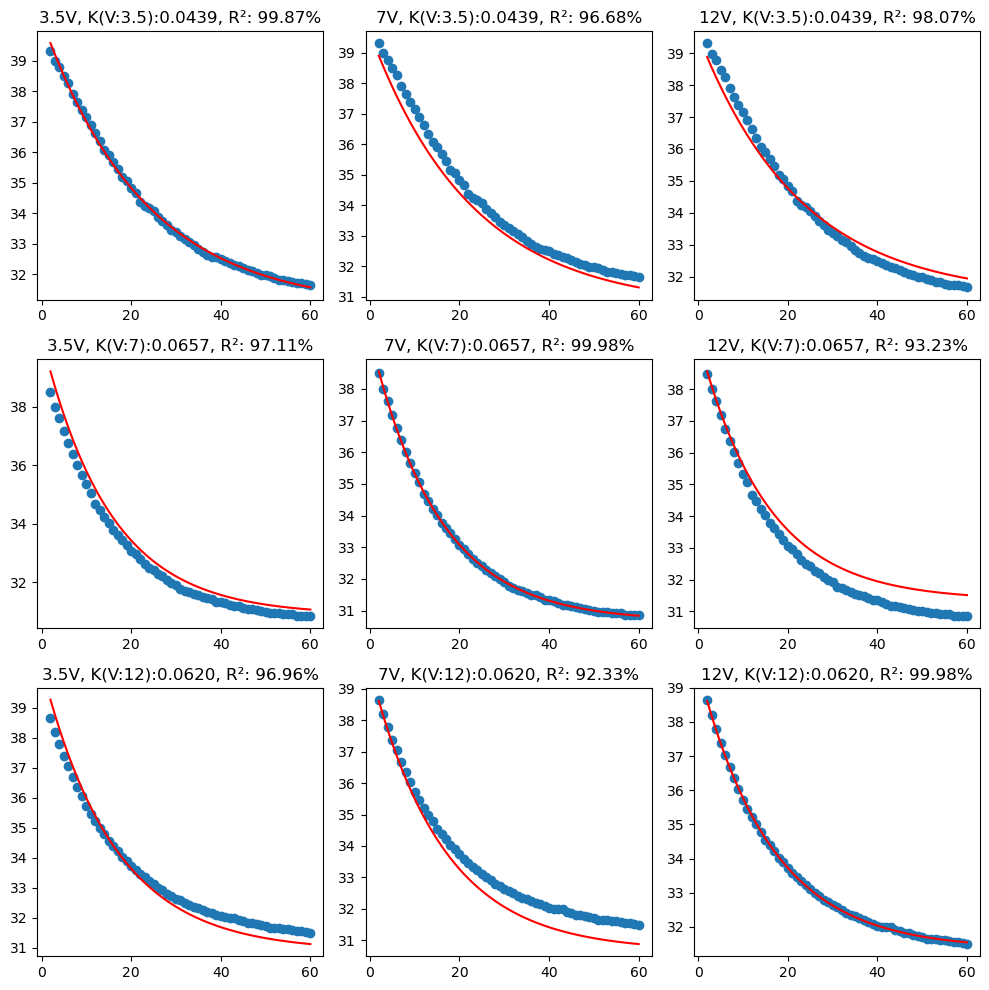

In [31]:
# test each kappa for every voltage experiment.

from sklearn.metrics import r2_score

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, kappa, df,volt_k in zip(range(3), kappas, dict.values(), volts):
    for j, temp_coef,volt in zip(range(3), temp_coefs, volts):
        axs[i, j].scatter(df[time], df[temp], label='data')
        y_pred = exponential(df[time], temp_coef[0], temp_coef[1], kappa)
        axs[i, j].plot(df[time], y_pred, label='fit', color='r')
        r2 = r2_score(df[temp], y_pred)
        axs[i, j].set_title(f'{volt}V, K(V:{volt_k}):{kappa:.4f}, R\u00b2: {r2:.2%}')


plt.tight_layout()
plt.show()


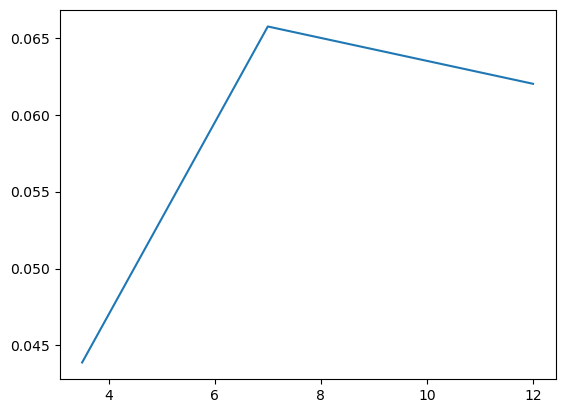

In [32]:
plt.plot(volts, kappas)